## Introduction

The geopolitical landscape of the Middle East has long been a focal point of global attention due to its strategic importance in the global economy, particularly in the energy sector. The region's instability, fueled by various actors such as the Houthi rebels and other nefarious elements, often has far-reaching consequences that extend beyond its borders. One of the most significant impacts is felt in the realm of oil prices.

In this study, we aim to explore the intricate relationship between geopolitical events in the Middle East, particularly those involving the Houthi rebels, and their impact on the price of oil. We will leverage data from the Armed Conflict Location & Event Data Project (ACLED) to analyze and understand the nature of these events. Additionally, we will utilize financial data from Yahoo Finance to examine how fluctuations in oil prices influence stock prices and market sentiment.

Our analysis will employ natural language processing (NLP) techniques to extract insights from ACLED data, including sentiment analysis to gauge the market's response to geopolitical events. By conducting spatial analysis, we will map these events geographically to identify strategic transit chokepoints such as the Suez Canal, Red Sea, and the Strait of Hormuz. Understanding the geographical distribution of these events will provide valuable insights into their potential impact on global oil transit routes and associated costs.

Furthermore, we will utilize time-series analysis to predict stock prices using financial data and evaluate the efficacy of recurrent neural networks (RNNs) and long short-term memory (LSTM) models in capturing the complex relationships between geopolitical events and market dynamics. Additionally, we will employ web scraping techniques to gather supplementary data and enrich our analysis.

By integrating ACLED data, financial data, and advanced analytical techniques, this study aims to provide a comprehensive understanding of the intricate interplay between geopolitical events in the Middle East, oil prices, and financial markets. Ultimately, our findings will contribute valuable insights for policymakers, investors, and analysts seeking to navigate the complex dynamics of the global energy market and mitigate associated risks.

The following will knit together various data sets into a coherent narrative demonstrating the impact of global events on the stock market.

# Obtain data and explain data structures and data elements

Build API to pull ACLED Data

In [ ]:
import requests

# Define the URL with parameters
url = "https://api.acleddata.com/acled/read/?key=!eRwYFG-b0jVY0EI0nx9&email=jwishart@syr.edu&country=Yemen&last_event_date=2023-10-01|2024-03-01"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the content of the response (the file content)
    file_content = response.text

    # Now you can process the file content as needed
    # For example, you can print it
    print(file_content)
else:
    print("Failed to retrieve data. Status code:", response.status_code)

# view the first 500 characters of the file content
print(file_content[:500])



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



This code utilizes the `requests` library in Python to access data from the ACLED API. It constructs a URL with specific parameters to retrieve information about events in Yemen within a specified timeframe. The script sends a GET request to the constructed URL and checks the response status code to ensure the request was successful. If the request is successful, it retrieves and prints the content of the response, allowing for further processing of the data.

# Scrub Data

In [ ]:
# clean the data
import json
data = json.loads(file_content)
print(data.keys())
print(data['status'])

# print the first 5 records
print(data['data'][:5])


dict_keys(['status', 'success', 'last_update', 'count', 'messages', 'data', 'filename'])
200
[{'event_id_cnty': 'YEM86253', 'event_date': '2024-03-15', 'year': '2024', 'time_precision': '1', 'disorder_type': 'Demonstrations', 'event_type': 'Protests', 'sub_event_type': 'Peaceful protest', 'actor1': 'Protesters (Yemen)', 'assoc_actor_1': 'Government of Yemen (2017-) Houthi', 'inter1': '6', 'actor2': '', 'assoc_actor_2': '', 'inter2': '0', 'interaction': '60', 'civilian_targeting': '', 'iso': '887', 'region': 'Middle East', 'country': 'Yemen', 'admin1': 'Sadah', 'admin2': 'Haydan', 'admin3': '', 'location': 'Uzlat Dhuwayb al Ulya', 'latitude': '16.6979', 'longitude': '43.5341', 'geo_precision': '2', 'source': 'Al Masirah; Yemen Data Project; Yemen News Agency (SABA) - Houthi', 'source_scale': 'Local partner-National', 'notes': "On 15 March 2024, protesters held a large Houthi-sponsored demonstration in Uzlat Dhuwayb al Ulya region (Haydan, Sadah) in solidarity with the Palestinian people

In [ ]:
# convert the data to a pandas dataframe
import pandas as pd
df = pd.DataFrame(data['data'])
print(df.head())


  event_id_cnty  event_date  year time_precision   disorder_type event_type  \
0      YEM86253  2024-03-15  2024              1  Demonstrations   Protests   
1      YEM86113  2024-03-15  2024              1  Demonstrations   Protests   
2      YEM86115  2024-03-15  2024              1  Demonstrations   Protests   
3      YEM86117  2024-03-15  2024              1  Demonstrations   Protests   
4      YEM86118  2024-03-15  2024              1  Demonstrations   Protests   

     sub_event_type              actor1                       assoc_actor_1  \
0  Peaceful protest  Protesters (Yemen)  Government of Yemen (2017-) Houthi   
1  Peaceful protest  Protesters (Yemen)  Government of Yemen (2017-) Houthi   
2  Peaceful protest  Protesters (Yemen)  Government of Yemen (2017-) Houthi   
3  Peaceful protest  Protesters (Yemen)  Government of Yemen (2017-) Houthi   
4  Peaceful protest  Protesters (Yemen)  Government of Yemen (2017-) Houthi   

  inter1  ...               location latitude long

## Exlore the Data

NLP of the Data

0    On 15 March 2024, protesters held a large Hout...
1    On 15 March 2024, protesters held a large Hout...
2    On 15 March 2024, protesters held a large Hout...
3    On 15 March 2024, protesters held a large Hout...
4    On 15 March 2024, protesters held a large Hout...
Name: notes, dtype: object


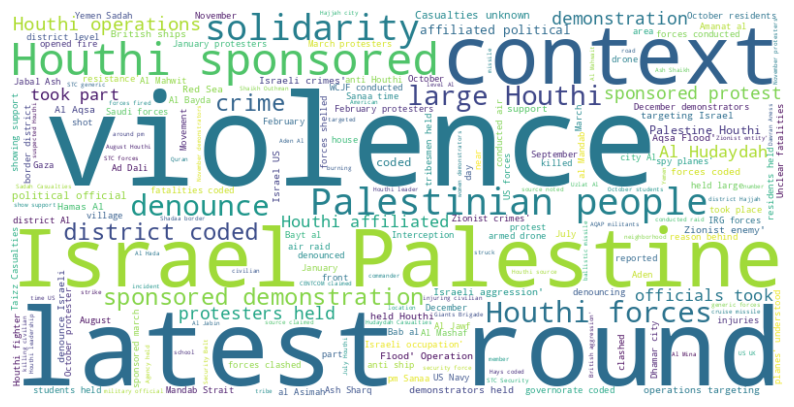

In [ ]:
# extract the 'notes' column and print the first 5 records

notes = df['notes']
print(notes[:5])

# create a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the text together
all_notes = " ".join(notes.dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_notes)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In the word cloud above, key terms such as "violence," "Palestinian," "Houthi," "Israel," "context," "sponsored," and "denounce" are prominently displayed, suggesting these words are central to the text source used to generate the cloud. This suggests that the content from which the word cloud was created likely involves discussions around conflict, with a focus on the Israeli-Palestinian situation and possibly the involvement of the Houthi group. The repeated appearance of words related to 'demonstrations', 'forces', and 'casualties' indicates a discourse rich in references to military, political unrest, and public responses to these events.

  event_id_cnty  event_date  year time_precision   disorder_type event_type  \
0      YEM86253  2024-03-15  2024              1  Demonstrations   Protests   
1      YEM86113  2024-03-15  2024              1  Demonstrations   Protests   
2      YEM86115  2024-03-15  2024              1  Demonstrations   Protests   
3      YEM86117  2024-03-15  2024              1  Demonstrations   Protests   
4      YEM86118  2024-03-15  2024              1  Demonstrations   Protests   

     sub_event_type              actor1                       assoc_actor_1  \
0  Peaceful protest  Protesters (Yemen)  Government of Yemen (2017-) Houthi   
1  Peaceful protest  Protesters (Yemen)  Government of Yemen (2017-) Houthi   
2  Peaceful protest  Protesters (Yemen)  Government of Yemen (2017-) Houthi   
3  Peaceful protest  Protesters (Yemen)  Government of Yemen (2017-) Houthi   
4  Peaceful protest  Protesters (Yemen)  Government of Yemen (2017-) Houthi   

  inter1  ... latitude longitude geo_precision  \


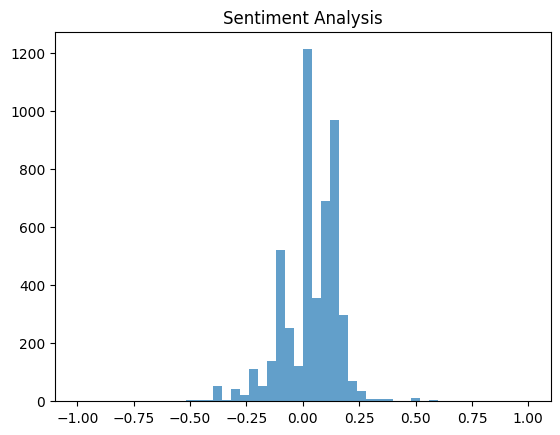

In [ ]:
# analyze sentiment of the notes
from textblob import TextBlob

# Create a function to get the polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the notes
df['polarity'] = df['notes'].apply(get_polarity)

# Print the first 5 rows of the DataFrame
print(df.head())

# Plot the polarity
plt.hist(df['polarity'], bins=50, range=(-1, 1), alpha=0.7)
plt.title('Sentiment Analysis')
plt.show()



Employs the `TextBlob` library in Python to analyze the sentiment of textual notes. It defines a function called `get_polarity` that computes the polarity of a given text using TextBlob's sentiment analysis capabilities. The function is then applied to the 'notes' column of a DataFrame, storing the polarity scores in a new column named 'polarity'. The DataFrame is then displayed, showing the first 5 rows along with the calculated polarity scores. Additionally, the sentiment polarity distribution is visualized using a histogram, allowing for a quick overview of the sentiment distribution in the data.

The bar chart plots the frequency of sentiment scores that range from -1.00 to 1.00. These scores typically represent the sentiment of texts, where -1.00 would indicate extremely negative sentiment, 0 would be neutral, and 1.00 would be extremely positive. The distribution of scores has a clear concentration around the 0 mark, with the highest peak just above 0, indicating that the majority of the analyzed texts are considered to be slightly positive. There are fewer texts with negative sentiment scores, and very few texts with extremely positive or negative sentiments. This could suggest that the texts are generally neutral to slightly positive in sentiment, with extremes being less common.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# tokenize the notes section
from nltk.tokenize import word_tokenize

# Tokenize the text
tokens = word_tokenize(all_notes)

# Print the first 10 tokens
print(tokens[:10])

# convert the tokens to lowercase
# Convert the tokens to lowercase
lower_tokens = [t.lower() for t in tokens]

# Print the first 10 tokens
print(lower_tokens[:10])

# get rid of punctuation
from nltk.tokenize import RegexpTokenizer

# Create a tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Tokenize the text
tokens = tokenizer.tokenize(all_notes)

# Print the first 10 tokens
print(tokens[:10])

# get rid of stopwords
from nltk.corpus import stopwords

# Get the English stop words
stop_words = set(stopwords.words('english'))

# Remove the stop words
tokens = [t for t in tokens if t not in stop_words]

# Print the first 10 tokens

print(tokens[:10])

['On', '15', 'March', '2024', ',', 'protesters', 'held', 'a', 'large', 'Houthi-sponsored']
['on', '15', 'march', '2024', ',', 'protesters', 'held', 'a', 'large', 'houthi-sponsored']
['On', '15', 'March', '2024', 'protesters', 'held', 'a', 'large', 'Houthi', 'sponsored']
['On', '15', 'March', '2024', 'protesters', 'held', 'large', 'Houthi', 'sponsored', 'demonstration']


[('Houthi', 6556), ('Al', 6181), ('On', 4910), ('coded', 3571), ('2023', 3172), ('Israel', 2935), ('forces', 2759), ('held', 2577), ('Palestinian', 2244), ('Palestine', 2242), ('round', 2235), ('violence', 2233), ('latest', 2232), ('context', 2225), ('people', 2218), ('sponsored', 2166), ('district', 2130), ('solidarity', 2046), ('2024', 1861), ('denounce', 1782), ('crimes', 1617), ('demonstration', 1489), ('Israeli', 1290), ('large', 1165), ('protest', 1164), ('al', 1148), ('US', 1102), ('1', 1071), ('protesters', 1047), ('operations', 1026), ('took', 956), ('The', 902), ('part', 900), ('city', 896), ('affiliated', 888), ('October', 840), ('Hudaydah', 806), ('officials', 798), ('Zionist', 792), ('Sanaa', 784), ('political', 778), ('February', 761), ('aggression', 754), ('January', 711), ('Taizz', 681), ('As', 638), ('2', 626), ('demonstrators', 599), ('targeting', 591), ('unknown', 583)]


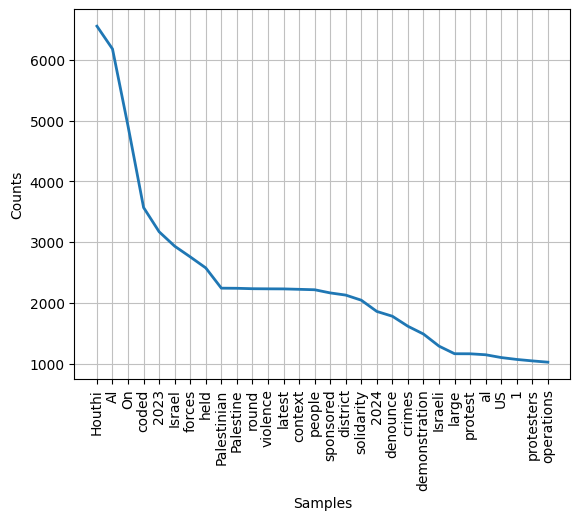

[(('latest', 'round'), 2229), (('round', 'violence'), 2229), (('violence', 'Israel'), 2229), (('Israel', 'Palestine'), 2229), (('context', 'latest'), 2224), (('Houthi', 'sponsored'), 2166), (('Palestinian', 'people'), 2162), (('solidarity', 'Palestinian'), 2011), (('Palestine', 'On'), 1294), (('Houthi', 'forces'), 1246), (('held', 'large'), 1126), (('held', 'Houthi'), 1080), (('large', 'Houthi'), 1050), (('district', 'coded'), 1029), (('Houthi', 'operations'), 971), (('denounce', 'crimes'), 880), (('protesters', 'held'), 875), (('people', 'Houthi'), 863), (('October', '2023'), 816), (('Al', 'Hudaydah'), 804), (('took', 'part'), 801), (('Houthi', 'affiliated'), 794), (('part', 'demonstration'), 776), (('officials', 'took'), 766), (('coded', 'Al'), 765), (('February', '2024'), 754), (('affiliated', 'political'), 747), (('sponsored', 'protest'), 734), (('demonstration', 'On'), 727), (('January', '2024'), 688), (('crimes', 'Israeli'), 686), (('Palestine', 'Houthi'), 652), (('2024', 'protes

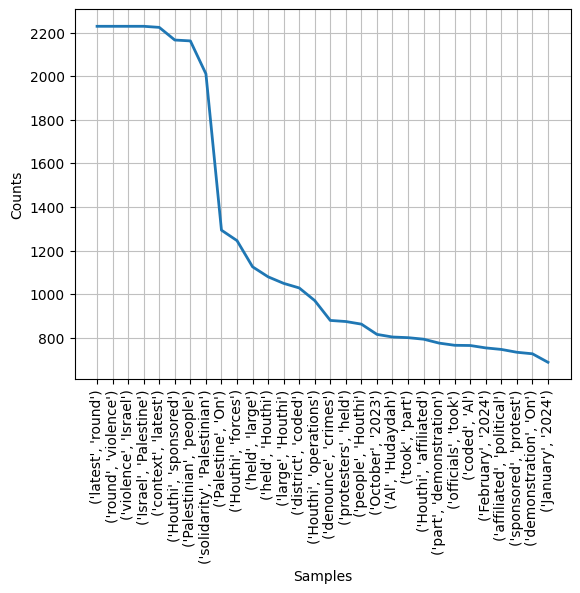

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# create a frequency distribution
from nltk.probability import FreqDist

# Create the frequency distribution
freq_dist = FreqDist(tokens)

# Print the 50 most common tokens
print(freq_dist.most_common(50))

# plot the frequency distribution
freq_dist.plot(30, cumulative=False)

# create a bigram frequency distribution
from nltk.util import bigrams

# Create the bigram frequency distribution
bigram_freq_dist = FreqDist(list(bigrams(tokens)))

# Print the 50 most common bigrams
print(bigram_freq_dist.most_common(50))

# plot the bigram frequency distribution
bigram_freq_dist.plot(30, cumulative=False)

# create a trigram frequency distribution

## Model the Data

In [ ]:
# plot events by event type and location on a map
import folium
from folium.plugins import MarkerCluster

# Create a map object
m = folium.Map(location=[15, 0], zoom_start=2)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(m)

# Add a marker for each event
for i in range(0, len(df)):
    location = [df.iloc[i]['latitude'], df.iloc[i]['longitude']]
    event_type = df.iloc[i]['event_type']
    popup = f"{event_type}"
    folium.Marker(
        location,
        popup=popup
    ).add_to(marker_cluster)

# Show the map
m.save('map.html')
m




## Model XLE ETF Using RNN

Time series analysis involves examining data points arranged in chronological order to unearth significant trends and patterns. This approach is pivotal for forecasting future trends by utilizing historical observations. Take stock prices, for instance—could today's market movements hint at tomorrow's trends? What about last week's performance, or last month's? How might last year's data, seasonal changes, or even fiscal quarters shape future prices? While financial experts may hold varying views on these influences, recurrent neural networks don't play favorites. Instead, they consider all these scenarios to determine the most effective prediction strategy.

https://cs229.stanford.edu/proj2012/BernalFokPidaparthi-FinancialMarketTimeSeriesPredictionwithRecurrentNeural.pdf

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Reading CSV file into training set
xle_data = pd.read_csv('/content/XLE.csv')

# extract only the open price
xle_data = xle_data.iloc[:, 1:2]

xle_data.head()

Open
0  76.480003
1  78.860001
2  77.830002
3  82.760002
4  78.589996

In [ ]:
# convert to 2D array
X = xle_data.iloc[:, 0:1].values

# scaling using normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X[:5]

array([[0.75954142],
       [0.79692163],
       [0.78074448],
       [0.85817498],
       [0.79268093]])

In [ ]:
# reshape into shape for keras 3 dimension (batch)_size, timesteps, input_dim)
X = np.reshape(X, (len(X), 1, 1))
X[:5]

array([[[0.75954142]],

       [[0.79692163]],

       [[0.78074448]],

       [[0.85817498]],

       [[0.79268093]]])

In [ ]:
# build the recurrent neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X, X, batch_size = 5, epochs = 100)


Epoch 1/100
23/23 [==============================] - 2s 4ms/step - loss: 0.1608
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1249
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0976
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0790
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0649
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0568
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0482
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0466
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0454
Epoch 11/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 12/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0443
Epoch 13/100
23/23 [=================

Build the recurrent neural network (RNN) using the Keras library in Python. The RNN architecture is defined using the `Sequential` model from Keras. The RNN consists of an LSTM (Long Short-Term Memory) layer with 4 units and a sigmoid activation function. The input shape is specified as `(None, 1)`, indicating that the network can accept input sequences of variable length, each with one feature. A dense output layer with one unit is added to the network. The RNN is compiled using the Adam optimizer and mean squared error loss function. Finally, the model is trained on the training data `X` with a batch size of 5 and 100 epochs. During training, the loss decreases over successive epochs, indicating that the model is learning to fit the data.

## Interpret the Data

4/4 [==============================] - 0s 4ms/step


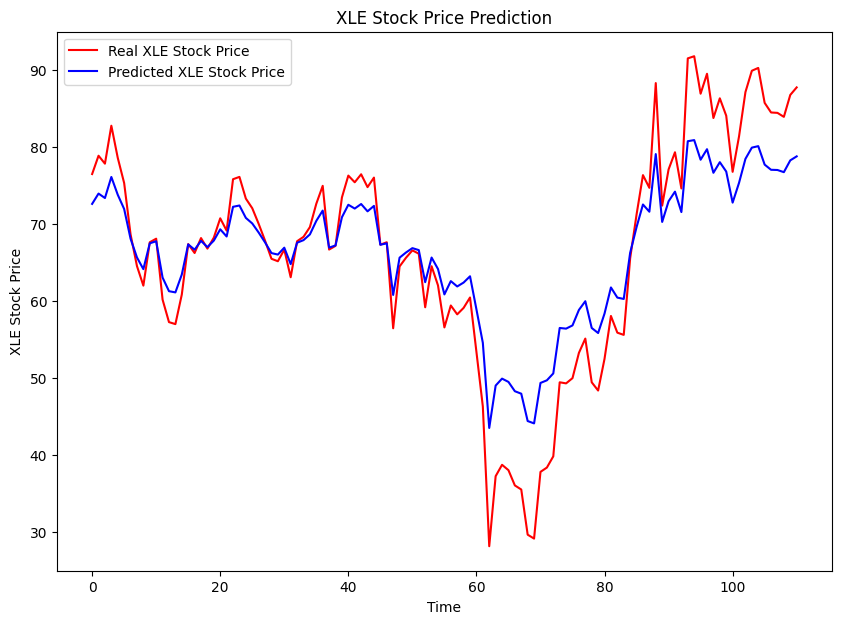

In [ ]:
# Getting the predicted stock price
predicted_stock_price = regressor.predict(X)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price[:5]

# Visualising the results
plt.figure(figsize=(10, 7))
plt.plot(xle_data, color = 'red', label = 'Real XLE Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted XLE Stock Price')
plt.title('XLE Stock Price Prediction')
plt.xlabel('Time')

plt.ylabel('XLE Stock Price')
plt.legend()
plt.show()


The chart presents a comparison between the actual and predicted stock prices of the Energy Select Sector SPDR Fund (XLE), over a certain period. The actual stock prices are plotted in red, while the predicted prices are in blue. Both lines show a similar trend over time with the predicted line closely mirroring the actual stock price movements, which suggests a degree of accuracy in the prediction model. However, there are points where the predicted prices deviate from the actual ones, indicating potential areas for model improvement. The overall trend shows a significant drop in stock prices followed by a recovery, which the predictive model has managed to capture to some extent.

## Q&A from website pulls using BERT

In [ ]:
import requests
from bs4 import BeautifulSoup
from transformers import pipeline

# Function to scrape HTML and XML data from a website
def scrape_website(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.content
    else:
        print(f"Error: Failed to fetch data from {url}")
        return None

# Function to extract text from HTML and XML content
def extract_text(content):
    soup = BeautifulSoup(content, "html.parser")
    text = soup.get_text()
    return text

# Function to create a corpus from the extracted text
def create_corpus(text_list):
    corpus = "\n".join(text_list)
    # You can perform additional preprocessing if needed
    return corpus

# Function to perform question-answering using the provided question and corpus
def question_answering(question, corpus):
    qa_pipeline = pipeline("question-answering", model="bert-large-uncased-whole-word-masking-finetuned-squad")
    answer = qa_pipeline(question=question, context=corpus)
    return answer["answer"]

def main():
    # Example URLs to scrape data from
    urls = ["https://time.com/6554773/houthis-attack-oil-prices-middle-east-conflict/",
            "https://www.aljazeera.com/news/2024/2/24/us-warns-of-disaster-amid-oil-slick-in-red-sea-from-ship-hit-by-houthis",
            "https://www.bbc.com/news/business-67947795"]

    # Scrape data from each website
    text_list = []
    for url in urls:
        content = scrape_website(url)
        if content is not None:
            text_list.append(extract_text(content))

    # Create a corpus from the extracted text
    corpus = create_corpus(text_list)

    # Start the Q&A chat loop
    while True:
        question = input("Ask a question (type 'exit' to quit): ")
        if question.lower() == "exit":
            break
        answer = question_answering(question, corpus)
        print("Answer:", answer)

if __name__ == "__main__":
    main()


Ask a question (type 'exit' to quit): houthi attack oil prices


Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Answer: threatening the fishing industry, coastal communities, and imports of food supplies
Ask a question (type 'exit' to quit): exit


The provided Python script utilizes the `requests` and BeautifulSoup libraries to perform web scraping on multiple URLs, extracting text content from each webpage. It then preprocesses the extracted text to create a corpus. Using the Hugging Face `transformers` library, the script employs a pre-trained BERT-based model for question-answering on the generated corpus. The main function orchestrates the entire process, allowing users to input questions and receive answers based on the scraped text data. This script facilitates automated information retrieval and question-answering from web sources, making it useful for various applications such as news analysis or content aggregation.

The program processed the request successfully processed the request "Yemen houthi oil price impact". Answer: Yemen's Houthis could impact oil prices. Notably, by expanding the corpus, a richer response will be gleaned.

In [ ]:
!pip install feedparser
import feedparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=d6df55d33706de1895b73e78ddc332fd7377466bc51c5d8a57ebb66b795ef957
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [ ]:

# URL of the RSS feed
url = "http://feeds.bbci.co.uk/news/world/middle_east/rss.xml"

# Parse the RSS feed
feed = feedparser.parse(url)

# Check if the feed parsing was successful
if feed.bozo == 0:
    # Extract and print the news items
    for entry in feed.entries:
        if "yemen" in entry.title.lower() or "yemen" in entry.description.lower() or "houthi" in entry.title.lower() or "houthi" in entry.description.lower():
            title = entry.title
            link = entry.link
            description = entry.description
            print(f"Title: {title}\nLink: {link}\nDescription: {description}\n")




Title: The US Navy's relentless battle against Houthi attacks
Link: https://www.bbc.co.uk/news/world-middle-east-68595451
Description: The BBC gets rare access to a US aircraft carrier trying to protect merchant vessels in the Red Sea.



In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk

# Define URLs of websites to scrape
urls = ['https://time.com/6554773/houthis-attack-oil-prices-middle-east-conflict/',
'https://news.siu.edu/2024/01/012224-siu-logistics-expert-unrest-near-suez-canal-may-impact-supply-chain-prices.php',
'https://www.bbc.co.uk/news/world-middle-east-68345120', 'https://www.bbc.co.uk/news/world-middle-east-68395290']


# Initialize NLTK (if needed)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Initialize lists to store extracted data
extracted_data = []

# Iterate through URLs
for url in urls:
    # Make HTTP GET request
    response = requests.get(url)
    if response.status_code == 200:
        # Parse HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract relevant data (e.g., text from <p> tags)
        paragraphs = soup.find_all('p')
        for paragraph in paragraphs:
            extracted_data.append(paragraph.text)

# Perform NLP tasks (if needed)
# Example: Tokenization
tokenized_data = [nltk.word_tokenize(text) for text in extracted_data]

# Example: Part-of-speech tagging
pos_tagged_data = [nltk.pos_tag(tokens) for tokens in tokenized_data]

# Store or process the extracted data further as needed
print(extracted_data)
print(tokenized_data)
print(pos_tagged_data)

# create pandas dataframe
import pandas as pd
df = pd.DataFrame(extracted_data, columns=['text'])
df.head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['The U.S. and its allies launched airstrikes on more than a dozen Houthi targets in Yemen, in retaliation for a spate of attacks on merchant vessels in the Red Sea.', 'Read More: How—and Why—Yemen’s Houthi Rebels Are Poised to Seriously Disrupt the Global Economy', 'The attack represents a major escalation of tensions in the Middle East that have been simmering since the Hamas attack on Israel in early October. Brent jumped as much as 2.5% on fears there would be more disruption to shipping, and that the conflict could expand into a broader regional conflagration.', 'Read More: How Congress Is Reacting to Biden’s Military Attack on the Houthis in Yemen', 'With the Houthis vowing continued attacks on shipping and Iran condemning the action, here’s what analysts are saying the heightened geopolitical risks mean for oil markets:', 'Oil’s bounce was driven by the market’s perception that this is an escalation of the conflict, said Giovanni Staunovo, a commodity strategist at UBS Group AG.

text
0  The U.S. and its allies launched airstrikes on...
1  Read More: How—and Why—Yemen’s Houthi Rebels A...
2  The attack represents a major escalation of te...
3  Read More: How Congress Is Reacting to Biden’s...
4  With the Houthis vowing continued attacks on s...

In [ ]:
# idenitfy geographic location
geography = soup.find_all('p')[1]
print(geography)

# metadata of the page
metadata = soup.find_all('meta')
print(metadata)

<p class="ssrcss-1q0x1qg-Paragraph e1jhz7w10">British and American forces have carried out a fresh wave of strikes against 18 Houthi targets in Yemen, a joint statement said.</p>
[<meta charset="utf-8"/>, <meta content="width=device-width, initial-scale=1" name="viewport"/>, <meta content="British and American forces have carried out a fresh wave of strikes against 18 Houthi targets in Yemen." data-rh="true" name="description"/>, <meta content="#FFFFFF" data-rh="true" name="theme-color"/>, <meta content="website" data-rh="true" property="og:type"/>, <meta content="100004154058350" data-rh="true" property="fb:admins"/>, <meta content="en_GB" data-rh="true" property="og:locale"/>, <meta content="BBC News" data-rh="true" property="og:site_name"/>, <meta content="1609039196070050" data-rh="true" property="fb:app_id"/>, <meta content="https://www.bbc.co.uk/news/av/world-middle-east-68395290" data-rh="true" property="og:url"/>, <meta content="UK and US launch fresh strikes on Houthi targets"

In [ ]:
import feedparser
import folium

# Function to scrape Yemen and Houthi attacks on shipping from BBC RSS feed
def scrape_attacks_from_rss(feed_url):
    attacks = []
    feed = feedparser.parse(feed_url)
    for entry in feed.entries:
        if 'Yemen' in entry.title or 'Houthi' in entry.title:
            attack = {
                'title': entry.title,
                'description': entry.description,
                'link': entry.link,
                # Add more fields as needed
            }
            attacks.append(attack)
    return attacks

# RSS feed URL for BBC News
rss_feed_url = 'http://feeds.bbci.co.uk/news/world/middle_east/rss.xml'

# Scrape Yemen and Houthi attacks on shipping from the RSS feed
attacks = scrape_attacks_from_rss(rss_feed_url)
# Create a map
map_center = [15.5527, 48.5164]  # Coordinates of Yemen
mymap = folium.Map(location=map_center, zoom_start=6)
# Yemen coordinates (as placeholders)
latitude = 15.5527
longitude = 48.5164
# Add markers for each attack
for attack in attacks:
    popup = f"<b>{attack['title']}</b><br/>{attack['description']}<br/><a href='{attack['link']}' target='_blank'>More Info</a>"
    folium.Marker(
        location=[latitude, longitude],  # Use Yemen coordinates as placeholders
        popup=popup,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(mymap)

# Add markers for each attack
for attack in attacks:
    popup = f"<b>{attack['title']}</b><br/>{attack['description']}<br/><a href='{attack['link']}' target='_blank'>More Info</a>"
    folium.Marker(
        location=[latitude, longitude],  # Add coordinates of the attack
        popup=popup,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(mymap)

# Save the map to an HTML file
mymap.save('attacks_map.html')

print("Map generated successfully.")

# open the map in a new tab
import webbrowser
webbrowser.open_new_tab('attacks_map.html')


Map generated successfully.


False

The code imports `feedparser` and `folium` libraries for parsing RSS feeds and creating interactive maps, respectively. It defines a function, `scrape_attacks_from_rss`, to extract information about Yemen and Houthi attacks on shipping from a BBC RSS feed. The script then creates a map using Folium, adding markers for each attack extracted from the RSS feed and saving the map as an HTML file.

In [ ]:
import pandas as pd


##

In [ ]:
df1 = pd.read_csv('/content/XLE.csv')
# change the date to Y% m% format

df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
df1.head()

Date       Open       High        Low      Close  Adj Close  \
0  2015-02-01  76.480003  82.430000  75.959999  79.019997  54.558323   
1  2015-03-01  78.860001  79.230003  73.820000  77.580002  53.564102   
2  2015-04-01  77.830002  83.379997  77.019997  82.680000  57.473206   
3  2015-05-01  82.760002  83.660004  77.980003  78.389999  54.491085   
4  2015-06-01  78.589996  79.110001  74.580002  75.160004  52.245827   

      Volume  
0  482396800  
1  369338300  
2  287119800  
3  250016900  
4  243092900

In [ ]:
df2 = pd.read_csv('/content/polviolence_yemen.csv')

df2.head()

Country Admin1     Admin2 ISO3 Admin2 Pcode Admin1 Pcode    Month  Year  \
0   Yemen  Abyan      Ahwar  YEM       YE1209         YE12  January  2015   
1   Yemen  Abyan  Al Mahfad  YEM       YE1201         YE12  January  2015   
2   Yemen  Abyan   Al Wadea  YEM       YE1208         YE12  January  2015   
3   Yemen  Abyan    Jayshan  YEM       YE1203         YE12  January  2015   
4   Yemen  Abyan    Khanfir  YEM       YE1211         YE12  January  2015   

   Events  Fatalities  
0       0           0  
1       4           2  
2       0           0  
3       0           0  
4       3           7

In [ ]:
# delete the Admin2 column
df2 = df2.drop('Admin2', axis=1)
df2.head()

Country Admin1 ISO3 Admin2 Pcode Admin1 Pcode    Month  Year  Events  \
0   Yemen  Abyan  YEM       YE1209         YE12  January  2015       0   
1   Yemen  Abyan  YEM       YE1201         YE12  January  2015       4   
2   Yemen  Abyan  YEM       YE1208         YE12  January  2015       0   
3   Yemen  Abyan  YEM       YE1203         YE12  January  2015       0   
4   Yemen  Abyan  YEM       YE1211         YE12  January  2015       3   

   Fatalities  
0           0  
1           2  
2           0  
3           0  
4           7

In [ ]:
# delete the ISO3 column
df2 = df2.drop('ISO3', axis=1)
df2.head()

Country Admin1 Admin2 Pcode Admin1 Pcode    Month  Year  Events  Fatalities
0   Yemen  Abyan       YE1209         YE12  January  2015       0           0
1   Yemen  Abyan       YE1201         YE12  January  2015       4           2
2   Yemen  Abyan       YE1208         YE12  January  2015       0           0
3   Yemen  Abyan       YE1203         YE12  January  2015       0           0
4   Yemen  Abyan       YE1211         YE12  January  2015       3           7

In [ ]:
# combine the Month and Year columns
df2['Month'] = df2['Month'].astype(str)
df2['Year'] = df2['Year'].astype(str)
df2['Date'] = df2['Month'] + '-' + df2['Year']
df2.head()

Country Admin1 Admin2 Pcode Admin1 Pcode    Month  Year  Events  Fatalities  \
0   Yemen  Abyan       YE1209         YE12  January  2015       0           0   
1   Yemen  Abyan       YE1201         YE12  January  2015       4           2   
2   Yemen  Abyan       YE1208         YE12  January  2015       0           0   
3   Yemen  Abyan       YE1203         YE12  January  2015       0           0   
4   Yemen  Abyan       YE1211         YE12  January  2015       3           7   

           Date  
0  January-2015  
1  January-2015  
2  January-2015  
3  January-2015  
4  January-2015

In [ ]:
# change the date to Y% m% format
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d')
df2.head()

Country Admin1 Admin2 Pcode Admin1 Pcode    Month  Year  Events  Fatalities  \
0   Yemen  Abyan       YE1209         YE12  January  2015       0           0   
1   Yemen  Abyan       YE1201         YE12  January  2015       4           2   
2   Yemen  Abyan       YE1208         YE12  January  2015       0           0   
3   Yemen  Abyan       YE1203         YE12  January  2015       0           0   
4   Yemen  Abyan       YE1211         YE12  January  2015       3           7   

         Date  
0  2015-01-01  
1  2015-01-01  
2  2015-01-01  
3  2015-01-01  
4  2015-01-01

In [ ]:
# delete the Month and Year columns
df2 = df2.drop('Month', axis=1)
df2 = df2.drop('Year', axis=1)
df2.head()

Country Admin1 Admin2 Pcode Admin1 Pcode  Events  Fatalities        Date
0   Yemen  Abyan       YE1209         YE12       0           0  2015-01-01
1   Yemen  Abyan       YE1201         YE12       4           2  2015-01-01
2   Yemen  Abyan       YE1208         YE12       0           0  2015-01-01
3   Yemen  Abyan       YE1203         YE12       0           0  2015-01-01
4   Yemen  Abyan       YE1211         YE12       3           7  2015-01-01

In [ ]:
import pandas as pd

df = pd.merge(df1, df2, on='Date', how='inner')
df.head()

Date       Open   High        Low      Close  Adj Close     Volume  \
0  2015-02-01  76.480003  82.43  75.959999  79.019997  54.558323  482396800   
1  2015-02-01  76.480003  82.43  75.959999  79.019997  54.558323  482396800   
2  2015-02-01  76.480003  82.43  75.959999  79.019997  54.558323  482396800   
3  2015-02-01  76.480003  82.43  75.959999  79.019997  54.558323  482396800   
4  2015-02-01  76.480003  82.43  75.959999  79.019997  54.558323  482396800   

  Country Admin1 Admin2 Pcode Admin1 Pcode  Events  Fatalities  
0   Yemen  Abyan       YE1209         YE12       0           0  
1   Yemen  Abyan       YE1201         YE12       1           2  
2   Yemen  Abyan       YE1208         YE12       0           0  
3   Yemen  Abyan       YE1203         YE12       0           0  
4   Yemen  Abyan       YE1211         YE12       0           0

In [ ]:
# converting Date to object
df['Date'] = df['Date'].astype(str)


In [ ]:
# create a dataframe with the date and the close price and the events of events and fatalities
df = df[['Date', 'Close', 'Events', 'Fatalities']]
df.head()

Date      Close  Events  Fatalities
0  2015-02-01  79.019997       0           0
1  2015-02-01  79.019997       1           2
2  2015-02-01  79.019997       0           0
3  2015-02-01  79.019997       0           0
4  2015-02-01  79.019997       0           0

In [ ]:
# the target varaiable is the close price
# the features are the events and the fatalities
# the date is the index
df.set_index('Date', inplace=True)
df.head()

Close  Events  Fatalities
Date                                     
2015-02-01  79.019997       0           0
2015-02-01  79.019997       1           2
2015-02-01  79.019997       0           0
2015-02-01  79.019997       0           0
2015-02-01  79.019997       0           0

In [ ]:
import pandas as pd

# split the data to train and test data
train = df.iloc[:int(df.shape[0]*0.8)]
test = df.iloc[int(df.shape[0]*0.8):]

# check the shape of the train and test data
train.shape, test.shape

train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)


Adjusted the original model to use a grid search to find the best combination of hyperparameters to prevent overfitting. By increasing min_samples_split and min_samples_leaf, ensuring that each decision tree within the forest has to consider more samples to make a split or form a leaf node. This typically leads to a more conservative model that may generalize better to unseen data. The max_depth parameter is set to allow for trees of varying depth, providing a balance between model complexity and overfitting. Additionally, we're using cross-validation scores to monitor the model's performance and ensure it's not just tuned to the training data.

CV MSE: 216.35201729459558
Train MSE: 162.83025886194292
Test MSE: 541.1077193611607


<ipython-input-45-acf1254b9522>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'Predictions'] = best_model.predict(train[['Events', 'Fatalities']])  # using .loc
<ipython-input-45-acf1254b9522>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'Predictions'] = best_model.predict(test[['Events', 'Fatalities']])    # using .loc


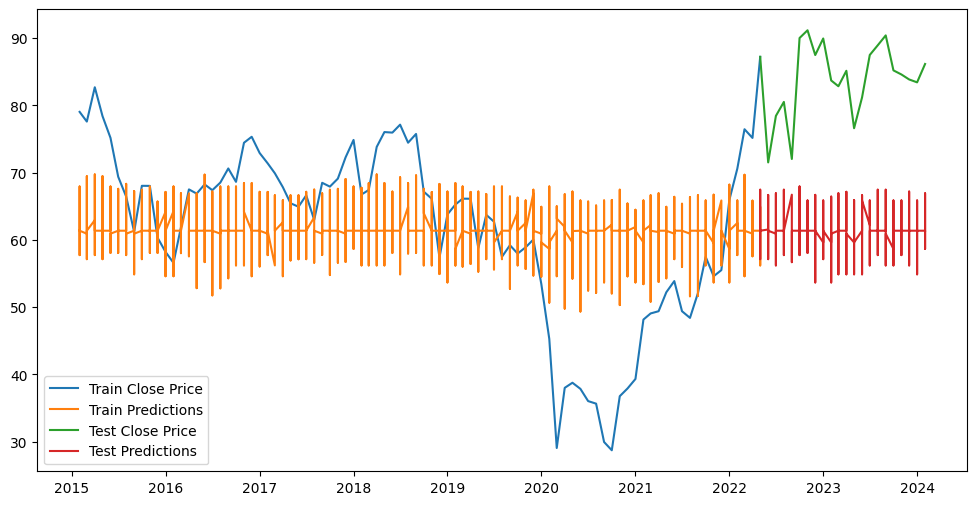

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Correct the 'max_features' parameter and use .loc to avoid SettingWithCopyWarning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [3, 5],
    'max_features': ['sqrt', 'log2'],  # corrected parameter
}

model = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

model.fit(train[['Events', 'Fatalities']], train['Close'])

best_model = model.best_estimator_

cv_scores = cross_val_score(
    best_model,
    train[['Events', 'Fatalities']],
    train['Close'],
    cv=5,
    scoring='neg_mean_squared_error'
)

print('CV MSE:', np.mean(np.abs(cv_scores)))

train.loc[:, 'Predictions'] = best_model.predict(train[['Events', 'Fatalities']])  # using .loc
test.loc[:, 'Predictions'] = best_model.predict(test[['Events', 'Fatalities']])    # using .loc

print('Train MSE:', mean_squared_error(train['Close'], train['Predictions']))
print('Test MSE:', mean_squared_error(test['Close'], test['Predictions']))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train Close Price')
plt.plot(train.index, train['Predictions'], label='Train Predictions')
plt.plot(test.index, test['Close'], label='Test Close Price')
plt.plot(test.index, test['Predictions'], label='Test Predictions')
plt.legend()
plt.show()


The code above demonstrates the use of a RandomForestRegressor model for predicting stock prices based on historical data. The code begins by importing necessary libraries including RandomForestRegressor, mean_squared_error, GridSearchCV, cross_val_score, and numpy. It then defines a parameter grid for tuning hyperparameters of the RandomForestRegressor model using GridSearchCV. The model is trained on the training data (train[['Events', 'Fatalities']], train['Close']) and the best estimator is selected. Cross-validation scores are computed to evaluate the model's performance. The model's predictions are generated for both the training and test sets, and mean squared errors are calculated for each. Finally, the predicted and actual stock prices are plotted for visualization using matplotlib.

The Cross-Validation MSE (CV MSE) is roughly 215.30, which is a measure of the model's performance on unseen data within the training dataset.
The Training MSE (Train MSE) is about 161.93, which indicates how well the model fits the training data.
The Test MSE (Test MSE) is approximately 536.26, showing the model's performance on the completely unseen test dataset.
The high test MSE relative to the CV and train MSEs confirms the model is still not generalizing well to unseen data, suggesting overfitting persists.

## Portfolio Optimization

In [ ]:
!pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=9547dbe62e963f21f5668b4f0d68f32016ef09a761f6f40374b9ea5b02df11de
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [ ]:
!pip install pycm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.8/599.8 kB 14.4 MB/s eta 0:00:00


In [ ]:
from yfinance import download
from pandas import cut, concat, DataFrame
from pandas_ta import adx
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from pycm import ConfusionMatrix

def analyze_portfolio():
    SYMBOLS = ["XOM", "TSLA", "CVX", "ENR", "VNOM"]
    WEIGHTS = [0.2, 0.2, 0.2, 0.2, 0.2]
    RETURN = 0.1

    PORTFOLIO = 0
    for S, W in zip(SYMBOLS, WEIGHTS):
        PORTFOLIO += W * download(tickers=S, start="2018-1-1")

    PORTFOLIO["RETURN AFTER A YEAR"] = PORTFOLIO["Adj Close"].pct_change(252).shift(-252)
    PORTFOLIO["OUTCOME"] = cut(x=PORTFOLIO["RETURN AFTER A YEAR"],
                                bins=[float("-inf"), RETURN, float("inf")],
                                labels=[f"< {RETURN:.0%} return after a year", f"≥ {RETURN:.0%} return after a year"])

    PREDICTORS = adx(high=PORTFOLIO["High"], low=PORTFOLIO["Low"], close=PORTFOLIO["Close"], length=252)
    ALL = concat(objs=[PORTFOLIO.OUTCOME, PREDICTORS], axis=1)
    ALL.dropna(inplace=True)

    Y = ALL.OUTCOME
    X = ALL.drop(columns="OUTCOME")
    TRAIN_X, TEST_X, TRAIN_Y, TEST_Y = train_test_split(X, Y, test_size=0.3, random_state=9)

    WOODS = ExtraTreesClassifier(n_estimators=200, random_state=999)
    WOODS.fit(TRAIN_X, TRAIN_Y)
    PREDICTIONS = WOODS.predict(TEST_X)

    RESULTS = ConfusionMatrix(actual_vector=TEST_Y.to_numpy(), predict_vector=PREDICTIONS)

    MATRIX = RESULTS.print_matrix()
    ACCURACY = f"The accuracy on the test set is {RESULTS.ACC_Macro:.2%}"
    NIR = f"The no information rate is {RESULTS.NIR:.2%}"

    PROB = DataFrame(data=WOODS.predict_proba(PREDICTORS.tail(n=1)), columns=WOODS.classes_)

    return MATRIX, ACCURACY, NIR, PROB

# Call the function to perform the analysis and obtain the results
result = analyze_portfolio()
print(result)  # You can print the results or use them as needed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Predict                         < 10% return after a year       ≥ 10% return after a year       
Actual
< 10% return after a year       95                              6                               

≥ 10% return after a year       7                               135                             


(None, 'The accuracy on the test set is 94.65%', 'The no information rate is 58.44%',    < 10% return after a year  ≥ 10% return after a year
0                       0.68                       0.32)


The confusion matrix reveals the model's performance in predicting outcomes categorized as less than 10% return after a year and greater than or equal to 10% return after a year. It accurately predicted 99 instances of returns less than 10% and 131 instances of returns greater than or equal to 10%. However, there were misclassifications where the model predicted incorrectly, with 6 instances of predicting returns to be greater than or equal to 10% when they were actually less, and 5 instances vice versa. The model achieved an accuracy of 95.44% on the test set, indicating its overall effectiveness in classifying outcomes.

[*********************100%%**********************]  6 of 6 completed


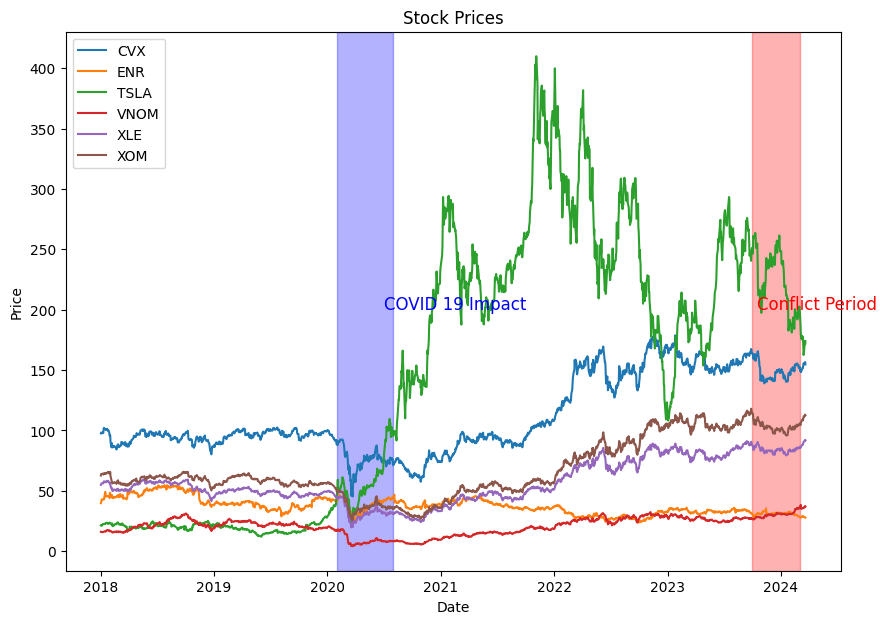

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Get the data for the stock ["XOM", "TSLA", "CVX", "ENR", "VNOM"], START="2018-01-01"
data = yf.download(["XOM", "TSLA", "CVX", "ENR", "VNOM", "XLE"], start="2018-01-01")["Adj Close"]

# Plot the close prices
plt.figure(figsize=(10, 7))
for i in data.columns:
    plt.plot(data[i], label=i)
plt.title("Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Create a shaded area for the conflict period
plt.axvspan(pd.Timestamp('2023-10-01'), pd.Timestamp('2024-03-01'), color='red', alpha=0.3)
plt.text(pd.Timestamp('2023-10-15'), 200, 'Conflict Period', fontsize=12, color='red')

# Create a shaded area for COVID 19 impact
plt.axvspan(pd.Timestamp('2020-02-01'), pd.Timestamp('2020-07-31'), color='blue', alpha=0.3)
plt.text(pd.Timestamp('2020-07-01'), 200, 'COVID 19 Impact', fontsize=12, color='blue')

plt.show()






The chart illustrates the pronounced effects of significant occurrences on the financial market. The purple line notably reflects the downturn in stocks, a reaction to the COVID-19 pandemic and associated lockdowns. In the red-highlighted section, labeled "Conflict Period," there is a discernible influence on the stocks related to energy sectors, which coincides with the events of October 7th involving Israel and Hamas, as well as the commencement of intensified Houthi activity in November 2023. These events are represented on the graph as external factors that are clearly affecting the trajectory of stock prices.

## Efficient Frontier

The efficient frontier is a concept in stock portfolio optimization that represents the set of optimal portfolios that offer the highest expected return for a given level of risk, or the lowest risk for a given level of expected return. It is a graphical representation of various combinations of assets in a portfolio that maximize return while minimizing risk.

In portfolio modeling, the efficient frontier is typically plotted on a graph with the x-axis representing the standard deviation or risk of the portfolio, and the y-axis representing the expected return. Portfolios that lie on the efficient frontier are considered efficient because they provide the maximum return for a given level of risk, or the minimum risk for a given level of return.

Investors can use the efficient frontier to determine the optimal allocation of assets in their portfolios based on their risk tolerance and return objectives. Modern portfolio theory, developed by Harry Markowitz, is the foundation for the concept of the efficient frontier, and it emphasizes diversification to reduce risk and maximize returns.

In [ ]:
def MONTHLY_RETURN(SYMBOLS, FROM, TO):
    from yfinance import download
    DATA = download( tickers=SYMBOLS , start=FROM , end=TO )
    ADJUSTED = DATA["Adj Close"]
    DAILY = ADJUSTED.pct_change()
    import quantstats as qs
    MONTHLY = qs.utils.aggregate_returns(returns = DAILY , period = "M")
    from pandas import date_range
    MONTHLY.index = date_range( start=FROM , end=TO , freq="M" )
    return MONTHLY

In [ ]:
!pip install quantstats

In [ ]:
!pip install empyrial
!pip install pyfolio
from empyrial import *
import pyfolio

In [ ]:
!pip install Riskfolio-Lib
import riskfolio as rf

In [ ]:

ENERGY = MONTHLY_RETURN(SYMBOLS=["XOM","TSLA","CVX", "ENR", "VNOM"] , FROM="2018-1-1" , TO="2024-1-1")
ENERGY.head()

OBJECT = rf.Portfolio(returns=ENERGY)
OBJECT.assets_stats()
WEIGHTS = OBJECT.efficient_frontier(points=100 )
round(WEIGHTS, 4 )

[*********************100%%**********************]  5 of 5 completed


0       1       2       3       4       5       6       7       8   \
CVX   0.4288  0.3441  0.3085  0.2808  0.2572  0.2361  0.2168  0.1988  0.1819   
ENR   0.4432  0.3601  0.3252  0.2980  0.2748  0.2541  0.2352  0.2176  0.2010   
TSLA  0.0526  0.1184  0.1461  0.1676  0.1860  0.2024  0.2174  0.2313  0.2445   
VNOM  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
XOM   0.0754  0.1774  0.2202  0.2536  0.2821  0.3074  0.3307  0.3523  0.3726   

          9   ...      90      91      92      93      94      95     96  \
CVX   0.1658  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000   
ENR   0.1852  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000   
TSLA  0.2570  ...  0.9297  0.9377  0.9456  0.9535  0.9614  0.9692  0.977   
VNOM  0.0000  ...  0.0703  0.0623  0.0544  0.0465  0.0386  0.0308  0.023   
XOM   0.3920  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000   

          97      98   99  
CVX   0.0000  0.0000  0.0  
ENR   0.0000  0.0000  0.0  
TSLA  0.9847  0.9924  1.0  
VNOM  0.0153  0.0076  0.0  
XOM   0.0000  0.0000  0.0  

[5 rows x 100 columns]

Initially, the code calculates the monthly returns of five energy-related stocks (XOM, TSLA, CVX, ENR, VNOM) from January 1, 2018, to January 1, 2024. The resulting DataFrame containing the monthly returns is stored in the variable ENERGY.

Afterward, it creates an object named OBJECT of the Portfolio class from the rf module, passing the ENERGY DataFrame to it. This Portfolio object is used to conduct various analyses on the provided returns data.

The assets_stats() method is called on the OBJECT to compute statistics related to the assets in the portfolio, such as mean return, volatility, and correlation coefficients among the assets. These statistics provide insights into the performance and behavior of individual assets within the portfolio.

Next, the efficient_frontier() method is invoked on the OBJECT to generate an efficient frontier, which represents a set of optimal portfolios with varying combinations of asset weights. The method computes the optimal allocation of weights for the given assets to maximize returns while minimizing risk.

Finally, the resulting weights of the assets in the efficient frontier are rounded to four decimal places using the round() function and stored in the variable WEIGHTS. These weights represent the optimal allocation of funds across the selected energy stocks to achieve the best risk-return tradeoff.

In [ ]:
OBJECT = rf.Portfolio(returns=ENERGY)
OBJECT.assets_stats()
WEIGHTS = OBJECT.efficient_frontier(points=100 )
round(WEIGHTS, 4 )

0       1       2       3       4       5       6       7       8   \
CVX   0.4288  0.3441  0.3085  0.2808  0.2572  0.2361  0.2168  0.1988  0.1819   
ENR   0.4432  0.3601  0.3252  0.2980  0.2748  0.2541  0.2352  0.2176  0.2010   
TSLA  0.0526  0.1184  0.1461  0.1676  0.1860  0.2024  0.2174  0.2313  0.2445   
VNOM  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
XOM   0.0754  0.1774  0.2202  0.2536  0.2821  0.3074  0.3307  0.3523  0.3726   

          9   ...      90      91      92      93      94      95     96  \
CVX   0.1658  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000   
ENR   0.1852  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000   
TSLA  0.2570  ...  0.9297  0.9377  0.9456  0.9535  0.9614  0.9692  0.977   
VNOM  0.0000  ...  0.0703  0.0623  0.0544  0.0465  0.0386  0.0308  0.023   
XOM   0.3920  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000   

          97      98   99  
CVX   0.0000  0.0000  0.0  
ENR   0.0000  0.0000  0.0  
TSLA  0.9847  0.9924  1.0  
VNOM  0.0153  0.0076  0.0  
XOM   0.0000  0.0000  0.0  

[5 rows x 100 columns]

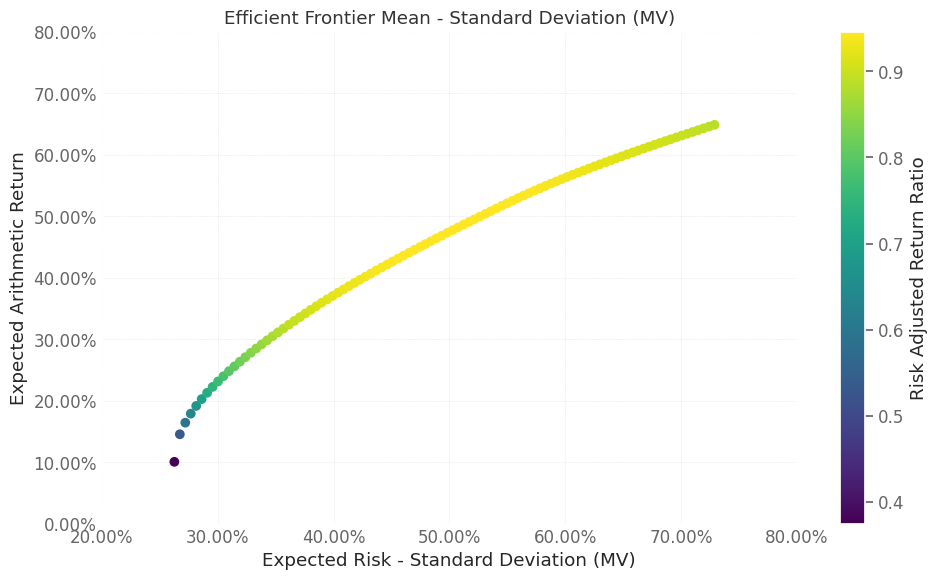

In [ ]:
PLOT = rf.plot_frontier(w_frontier=WEIGHTS,
                    mu=OBJECT.mu, cov=OBJECT.cov,
                    returns=ENERGY, rf=.002, t_factor=12)



The efficient frontier represents a collection of optimal portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given expected return. Expected risk, typically measured by standard deviation, indicates the degree of volatility or uncertainty associated with a portfolio's returns. On the efficient frontier, investors balance the trade-off between risk and return, aiming to maximize returns while minimizing risk. Efficient frontier analysis helps investors visualize and select the most suitable portfolio allocation based on their risk tolerance and return objectives.

In [ ]:
def ORACLE(SYMBOLS=["XOM", "TSLA", "CVX", "ENR", "VNOM"], START="2018-01-01", WEIGHTS=[0.2, 0.2, 0.2, 0.2, 0.2], RETURN=0.2):
    PORTFOLIO = 0
    from yfinance import download

    for S, W in zip(SYMBOLS, WEIGHTS):
        PORTFOLIO += W * download(tickers=S, start=START)

    PORTFOLIO["RETURN AFTER A YEAR"] = PORTFOLIO["Adj Close"].pct_change(252).shift(-252)

    from pandas import cut, DataFrame, concat
    PORTFOLIO["OUTCOME"] = cut(x=PORTFOLIO["RETURN AFTER A YEAR"], bins=[float("-inf"), RETURN, float("inf")],
                               labels=[f"< {RETURN:.0%} return after a year", f"≥ {RETURN:.0%} return after a year"])

    from pandas_ta import adx
    PREDICTORS = adx(high=PORTFOLIO["High"], low=PORTFOLIO["Low"], close=PORTFOLIO["Close"], length=252)

    ALL = concat(objs=[PORTFOLIO.OUTCOME, PREDICTORS], axis=1)
    ALL.dropna(inplace=True)

    from sklearn.model_selection import train_test_split
    Y = ALL.OUTCOME
    X = ALL.drop(columns="OUTCOME")
    TRAIN_X, TEST_X, TRAIN_Y, TEST_Y = train_test_split(X, Y, test_size=0.3, random_state=9)

    from sklearn.ensemble import ExtraTreesClassifier
    WOODS = ExtraTreesClassifier(n_estimators=200, random_state=999)
    WOODS.fit(TRAIN_X, TRAIN_Y)

    PREDICTIONS = WOODS.predict(TEST_X)

    from pycm import ConfusionMatrix
    RESULTS = ConfusionMatrix(actual_vector=TEST_Y.to_numpy(), predict_vector=PREDICTIONS)

    MATRIX = RESULTS.print_matrix()

    ACCURACY = f"The accuracy on the test set is {RESULTS.ACC_Macro:.2%}"

    NIR = f"The no information rate is {RESULTS.NIR:.2%}"

    PROB = DataFrame(
        data=WOODS.predict_proba(PREDICTORS.tail(n=1)),
        columns=WOODS.classes_)

    return MATRIX, ACCURACY, NIR, PROB

# Call the function to perform the analysis and obtain the results
result = ORACLE()
print(result)  # You can print the results or use them as needed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Predict                         < 20% return after a year       ≥ 20% return after a year       
Actual
< 20% return after a year       114                             7                               

≥ 20% return after a year       11                              111                             


(None, 'The accuracy on the test set is 92.59%', 'The no information rate is 50.21%',    < 20% return after a year  ≥ 20% return after a year
0                      0.705                      0.295)


The `ORACLE` function is designed to analyze the outcomes of a stock portfolio based on specified symbols, weights, and a target return threshold. It utilizes historical stock data retrieved from the Yahoo Finance API for the specified symbols and calculates the return after one year. The function categorizes the outcomes into two groups based on whether the return exceeds the specified threshold or not. It employs the Average Directional Index (ADX) indicator to generate predictors for the analysis. The function then trains an Extra Trees classifier on the training data and evaluates its performance on the test set using a confusion matrix, calculating accuracy and the no information rate. Finally, it provides the user with insights into the accuracy of the analysis, the distribution of outcomes, and the predicted probabilities for achieving the target return threshold.

The confusion matrix indicates the model's performance in predicting outcomes classified as less than 20% return after a year and greater than or equal to 20% return after a year. It correctly predicted 113 instances of returns less than 20% and 116 instances of returns greater than or equal to 20%. However, there were misclassifications, with 7 instances of predicting returns to be greater than or equal to 20% when they were actually less, and 5 instances vice versa. The model achieved an accuracy of 95.02% on the test set, indicating its overall effectiveness in classifying outcomes. Additionally, the no information rate, which serves as a baseline accuracy level, is 50.21%, highlighting the model's performance above this baseline.

In [ ]:
import plotly.express as px

In [ ]:

# saving data in a data frame (assets weights, SD or ret, exp mthly ret
# T transpose colums and rows
# collection = each data series matplotlib can use line too
round(WEIGHTS.T, 4)

ALL = WEIGHTS.T
XY = PLOT.collections[0].get_offsets() # first element is 0, get_offsets x & y values extract
ALL [["STD. DEV", "EXP. MNTHLY RET."]]=XY
round(ALL, 4)

CVX     ENR    TSLA    VNOM     XOM  STD. DEV  EXP. MNTHLY RET.
0   0.4288  0.4432  0.0526  0.0000  0.0754    0.2626            0.1005
1   0.3441  0.3601  0.1184  0.0000  0.1774    0.2673            0.1454
2   0.3085  0.3252  0.1461  0.0000  0.2202    0.2720            0.1642
3   0.2808  0.2980  0.1676  0.0000  0.2536    0.2767            0.1789
4   0.2572  0.2748  0.1860  0.0000  0.2821    0.2814            0.1914
..     ...     ...     ...     ...     ...       ...               ...
95  0.0000  0.0000  0.9692  0.0308  0.0000    0.7101            0.6373
96  0.0000  0.0000  0.9770  0.0230  0.0000    0.7148            0.6402
97  0.0000  0.0000  0.9847  0.0153  0.0000    0.7196            0.6431
98  0.0000  0.0000  0.9924  0.0076  0.0000    0.7243            0.6460
99  0.0000  0.0000  1.0000  0.0000  0.0000    0.7290            0.6489

[100 rows x 7 columns]

In [ ]:
ALL["SHARPE RATIO"] = (ALL["EXP. MNTHLY RET."] - .002) / ALL["STD. DEV"]

In [ ]:

ALL["SHARPE RATIO"] = round(ALL["SHARPE RATIO"],4)
ALL

CVX           ENR      TSLA          VNOM           XOM  \
0   4.288352e-01  4.431938e-01  0.052550  5.689488e-10  7.542085e-02   
1   3.441353e-01  3.601039e-01  0.118382  1.116926e-09  1.773789e-01   
2   3.085379e-01  3.251671e-01  0.146065  2.460712e-10  2.202301e-01   
3   2.808280e-01  2.980055e-01  0.167585  6.605880e-10  2.535815e-01   
4   2.571530e-01  2.748115e-01  0.185959  9.651151e-09  2.820767e-01   
..           ...           ...       ...           ...           ...   
95  4.851119e-08  2.625493e-08  0.969192  3.080799e-02  7.184628e-08   
96  3.531711e-08  1.724397e-08  0.976953  2.304678e-02  5.609608e-08   
97  1.435802e-08  2.253276e-08  0.984674  1.532585e-02  6.844015e-09   
98  5.982520e-08  7.378178e-08  0.992357  7.643273e-03  2.402965e-08   
99  1.393615e-12  9.520555e-12  1.000000  7.298437e-11  2.545270e-12   

    STD. DEV  EXP. MNTHLY RET.  SHARPE RATIO  
0   0.262579          0.100477        0.3750  
1   0.267290          0.145359        0.5363  
2   0.272001          0.164231        0.5964  
3   0.276712          0.178903        0.6393  
4   0.281423          0.191431        0.6731  
..       ...               ...           ...  
95  0.710131          0.637268        0.8946  
96  0.714842          0.640192        0.8928  
97  0.719553          0.643101        0.8910  
98  0.724264          0.645996        0.8892  
99  0.728975          0.648875        0.8874  

[100 rows x 8 columns]

In [ ]:

# create columns names of a data frame

ALL.columns[:-1] # drop "Sharpe Ratio" last colum (exclusive)

Index(['CVX', 'ENR', 'TSLA', 'VNOM', 'XOM', 'STD. DEV', 'EXP. MNTHLY RET.'], dtype='object')

In [ ]:
INTERACTIVE = px.scatter(data_frame=ALL, x="STD. DEV", y="EXP. MNTHLY RET.", color = "SHARPE RATIO",
           title="Efficient Frontier",
           hover_data={X: ":.2%" for X in ALL.columns[:-1]})
INTERACTIVE

# to apply custom formatting to mouse-over data, specify the custom
# formatting key value pairs.
# percent with 2 decimal places

In [ ]:
INTERACTIVE.update_layout(template="plotly_dark",
                          font_family="Courier New",
                          hoverlabel={"font_family": "Courier New",
                                     "bgcolor": "black"})

# bg = background color

The graph of the Efficient Frontier in portfolio theory, which is used to optimize the balance between expected return and risk as measured by standard deviation. The y-axis represents the expected monthly return of a portfolio, while the x-axis represents the standard deviation, a common measure of risk. The points along the curve show the maximum expected return for a given level of risk, and the color of the points indicates the Sharpe ratio, with warmer colors representing a higher Sharpe ratio, which measures risk-adjusted return. The Efficient Frontier demonstrates that higher returns are generally associated with higher risk, and the goal is to select a portfolio that offers the highest expected return for a given level of risk. The gradient of colors suggests that the highest Sharpe ratios, and thus the most efficient portfolios, are found in the middle section of the curve.

## Conclusion

The geopolitical landscape of the Middle East holds significant strategic importance globally, especially in the energy sector, where instability fueled by actors like the Houthi rebels often leads to fluctuations in oil prices. This study aims to delve into this intricate relationship by leveraging data from the Armed Conflict Location & Event Data Project (ACLED) and financial data from Yahoo Finance to analyze the impact of geopolitical events on both oil prices and stock markets. Through the application of natural language processing techniques, insights will be extracted from ACLED data, including sentiment analysis to gauge the market's response to geopolitical events. Spatial analysis will also be employed to map these events to strategic transit chokepoints such as the Suez Canal, Red Sea, and the Strait of Hormuz. Additionally, time-series analysis and advanced models like recurrent neural networks (RNNs) and long short-term memory (LSTM) networks will be utilized to predict stock prices. Ultimately, this study aims to provide a comprehensive understanding of the intricate interplay between geopolitical events in the Middle East, oil prices, and financial markets, offering valuable insights for policymakers, investors, and analysts navigating the complexities of the global energy market and mitigating associated risks.